In [21]:
import torch
pret_dir = "/home/artur/Schreibtisch/DiscriminatingHyperplaneFork/discriminating-hyperplane/Double_Learning_Safety_Performance/data/Cartpole_Expanding_starting_states_large_sigma_perf_hyperplane_policy_real1/Cartpole_Expanding_starting_states_large_sigma_perf_hyperplane_policy_real1-customEnvs/CartPole_s62/pyt_save/model.pt"
#pret_dir = '/home/artur/Schreibtisch/DiscriminatingHyperplaneFork/discriminating-hyperplane/Double_Learning_Safety_Performance/data/double_learner/double_learner-customEnvs/CartPole_s42/terminated/failed_model_9421_9509.pt'
sppo_ac = torch.load(pret_dir)

/tmp/ipykernel_29874/827828048.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sppo_ac = torch.load(pret_dir)


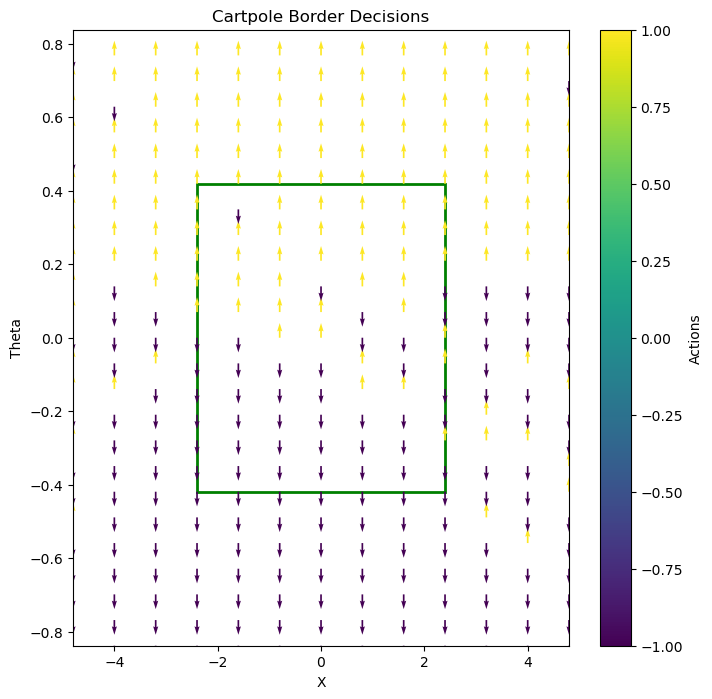

In [18]:
#Plot positive or negative sampled action for each state
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
ac = sppo_ac
safe_radians = 24 * 2 * math.pi / 360
borders = []
arrowDirX=[]
arrowDirY=[]
safe_x=2.4
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
colors = []
for x in np.arange(-2.4-2.4,2.5+2.4,0.8):
    for theta in np.arange(-safe_radians*2,safe_radians*2,math.pi / 360 *8):
        o=[x,0,theta,0]
        a, a_h, b_h, v, logp_a, logp_b = ac.step(torch.as_tensor(o, dtype=torch.float32))
        borders.append([x,theta])
        threshold = np.clip((b_h/a_h)[0],-1,1)
        if a<=0:
            arrowDirX.append(0)
            arrowDirY.append(-1)
            colors.append(-1)
        else:
            arrowDirX.append(0)
            arrowDirY.append(1)
            colors.append(1)
borders = np.array(borders)
rectangle = patches.Rectangle((-safe_x, -safe_radians), 2*safe_x, 2*safe_radians, linewidth=2, edgecolor='green', facecolor='white')
ax.add_patch(rectangle)
quiver_plot=plt.quiver(borders[:,0], borders[:,1], arrowDirX, arrowDirY,colors, cmap ="viridis", angles='xy', scale_units='xy', scale=25)
# This are the borders of the simulation
plt.axis([-2*safe_x, 2*safe_x, -2*safe_radians, 2*safe_radians])
plt.colorbar(quiver_plot, label="Actions")            
plt.xlabel("X")
plt.ylabel("Theta")
plt.title("Cartpole Border Decisions")
plt.show()

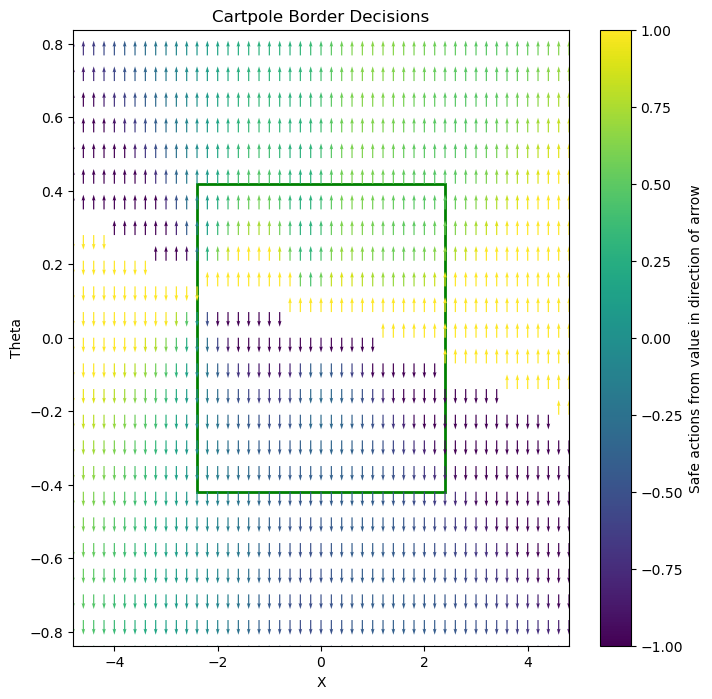

In [22]:
#Plot the hyperplanes in safe direction for all states
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
ac = sppo_ac
safe_radians = 24 * 2 * math.pi / 360
borders = []
arrowDirX=[]
arrowDirY=[]
safe_x=2.4
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
colors = []
for x in np.arange(-2.4-2.4,2.5+2.4,0.2):
    for theta in np.arange(-safe_radians*2,safe_radians*2,math.pi / 360 *8):
        o=[x,0,theta,0]
        a, a_h, b_h, v= ac.stepEval(torch.as_tensor(o, dtype=torch.float32))
        borders.append([x,theta])
        threshold = np.clip((b_h/a_h)[0],-1,1)
        if(a_h>0):
            to_right_is_dangerous = False
        else:
            to_right_is_dangerous = True
        if to_right_is_dangerous:
            arrowDirX.append(0)
            arrowDirY.append(-1)
            colors.append(threshold)
        else:
            arrowDirX.append(0)
            arrowDirY.append(1)
            colors.append(threshold)
borders = np.array(borders)
rectangle = patches.Rectangle((-safe_x, -safe_radians), 2*safe_x, 2*safe_radians, linewidth=2, edgecolor='green', facecolor='white')
ax.add_patch(rectangle)
quiver_plot=plt.quiver(borders[:,0], borders[:,1], arrowDirX, arrowDirY,colors, cmap ="viridis", angles='xy', scale_units='xy', scale=25)
# This are the borders of the simulation
plt.axis([-2*safe_x, 2*safe_x, -2*safe_radians, 2*safe_radians])
plt.colorbar(quiver_plot, label="Safe actions from value in direction of arrow")            
plt.xlabel("X")
plt.ylabel("Theta")
plt.title("Cartpole Border Decisions")
plt.show()

In [8]:
import gymnasium
from gymnasium.envs.registration import register
from envs.cartpole_pret import CartPole
register(
    id="customEnvs/CartPole",
    entry_point="envs.cartpole_pret:CartPole",
)
def make_env(env_id, human):
    def thunk():
        if not human:
            env = gymnasium.make(env_id, render_mode="rgb_array",focus = 1.6, rewardtype = 1)
        else:
            env = gymnasium.make(env_id, render_mode="human",focus = 1.6, rewardtype = 1)
        env = gymnasium.wrappers.RecordEpisodeStatistics(env)
        return env

    return thunk
env_fn = make_env("customEnvs/CartPole", False)
env = env_fn()
#o, info = env.reset(options={"state":[0,0,0,0]})

/home/artur/miniconda3/envs/fsrl/lib/python3.8/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/home/artur/miniconda3/envs/fsrl/lib/python3.8/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [8]:
#Run from good starting point and rende
import time
ac = sppo_ac
o, info = env.reset(options={"state":[0,0,0,0]})
action_sequence=[0.3]*100
for step in range(100):
    env.render()
    performance_action = action_sequence[step]
    a, a_h, b_h, v, logp_a, logp_b = ac.stepEval(torch.as_tensor(o, dtype=torch.float32))
    filtered_action, filtered , projected= ac.filter_actions(a_h,b_h,performance_action)
    print(f"Step:{step} Action {'' if filtered else 'not'} filtered and {'' if projected else 'not'} projected")
    #print(f"Action:{a}")
    #print(f"Obs:{o[2]}")
    #print(step)
    #next_o, r, d, info = env.step(np.array([action_sequence[step]], dtype=np.float32))
    filtered_action = filtered_action.detach().cpu().numpy()
    next_o, r, d, truncated, info = env.step(filtered_action)
    o = next_o
    time.sleep(0.4)
env.close()

TypeError: integer argument expected, got float

In [6]:
#Start from probably bad position and render
from envs.cartpole_pret import Cartpole
import time
import numpy as np
env = Cartpole(0, 0, focus=0)
ac = sppo_ac
o = env.reset([2,0,-0.4,0])
for step in range(100):
    env.render()
    a, a_h, b_h, v, vc, logp_a, logp_b = ac.stepEval(torch.as_tensor(o, dtype=torch.float32))
    #print(f"Action:{a}")
    #print(f"Obs:{o[2]}")
    #print(step)
    threshold = np.clip((b_h/a_h)[0],-1,1)
    if(a_h>0):
        to_right_is_dangerous = False
    else:
        to_right_is_dangerous = True
    if to_right_is_dangerous:
        print(f"Limits: -1 - {threshold}, Action: {a}")
    else:
        print(f"Limits: {threshold} - 1, Action: {a}")
    next_o, r, d, info = env.step(np.array([action_sequence[step]], dtype=np.float32))
    print(a)
    print(o)
    o = next_o
    time.sleep(2)

ImportError: cannot import name 'Cartpole' from 'envs.cartpole_pret' (/home/artur/Schreibtisch/DiscriminatingHyperplaneFork/discriminating-hyperplane/RL-DH/envs/cartpole_pret.py)

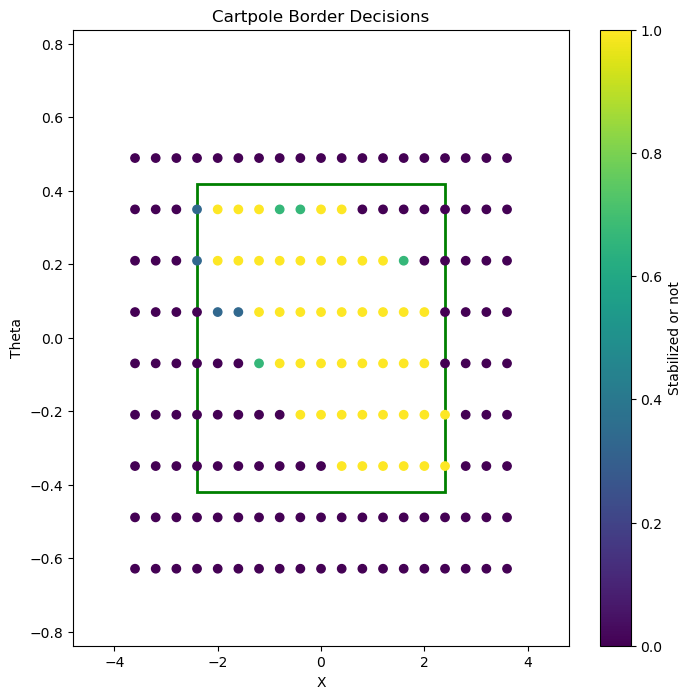

In [23]:
# Test from where it can stabilize and plot it
import time
import numpy as np
ac = sppo_ac
borders=[]
colors=[]
for x in np.arange(-2.4-1.2,2.5+1.2,0.4):
    for theta in np.arange(-safe_radians*1.5,safe_radians*1.5,math.pi / 360 *16):
        color = 0
        for i in range(3):
            o, info = env.reset(options={"state":[x,0,theta,0]})
            steps = 0
            done = False
            while not done and steps <=1000:
                a, a_h, b_h, v= ac.stepEval(torch.as_tensor(o, dtype=torch.float32))
                threshold = np.clip((b_h/a_h)[0],-1,1)
                next_o, r, d,truncated, info = env.step(a)
                done = d
                steps +=1
                o = next_o
            if done: 
                color+=0
            else:
                color+=1
        colors.append(color/3)
        borders.append([x,theta])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
borders = np.array(borders)
safe_x = 2.4
safe_radians = 24 * 2 * math.pi / 360
rectangle = patches.Rectangle((-safe_x, -safe_radians), 2*safe_x, 2*safe_radians, linewidth=2, edgecolor='green', facecolor='white')
ax.add_patch(rectangle)
scatter_plot=plt.scatter(borders[:,0], borders[:,1],c= colors, cmap="viridis")
# This are the borders of the simulation
plt.axis([-2*safe_x, 2*safe_x, -2*safe_radians, 2*safe_radians])
plt.colorbar(scatter_plot, label="Stabilized or not")            
plt.xlabel("X")
plt.ylabel("Theta")
plt.title("Cartpole Border Decisions")
plt.show()  # Close plot to avoid replotting issues


[[0.04128124418642645, -0.03715219980960745, False, 0.67203337], [0.04091685542486476, -0.037312822869812634, False, 0.5798801], [0.04301703326634898, -0.041386149456349705, False, 0.4020013], [0.04602937048898665, -0.047046111254251434, True, -0.8361823], [0.03805246756881313, -0.036479608806878554, True, -0.19293492], [0.023908391443530776, -0.016949111285447474, True, -0.2339091], [0.010562679230094017, 0.0011701845758450014, True, -0.48539984], [0.0018931552589219816, 0.012176549551596827, True, -0.21228129], [-0.013403414878627437, 0.033130357654681655, True, -0.08413368], [-0.03270168954120399, 0.0601578738982705, True, -0.26353434], [-0.05281118183211314, 0.08859631970624884, True, -0.16194214], [-0.0693946899186256, 0.11210887162628355, True, 0.017645817], [-0.08404780075688983, 0.13325744957008473, True, -0.16859905], [-0.09123340838000894, 0.14393291010164655, True, -0.15172057], [-0.09275692450455053, 0.14697176737015236, True, -0.48502156], [-0.08500018919705256, 0.13707759

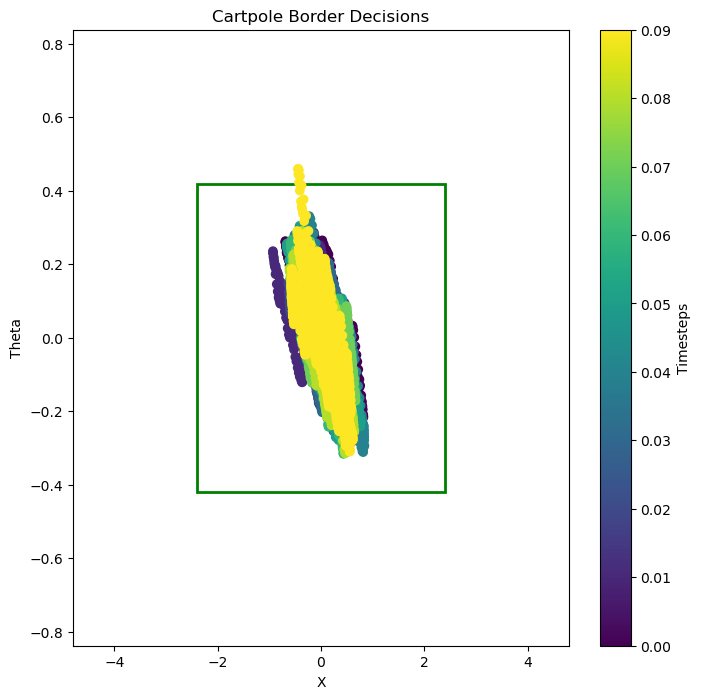

In [ ]:
#Scatter run good from 0,0 trajectories
from envs.cartpole_pret import Cartpole
import time
import numpy as np
env = Cartpole(0, 0, focus=0)
ac = sppo_ac
evalIters=10
borders = []
colors = []
for i in range(evalIters):
    d = False
    steps = 0
    o = env.reset()
    while(not (d or (steps%4000==0 and steps != 0)) ):
        a, a_h, b_h, v, vc, logp_a, logp_b = ac.stepEval(torch.as_tensor(o, dtype=torch.float32))
        next_o, r, d, info = env.step(a)
        steps +=1
        if(a_h>0):
            to_right_is_dangerous = True
        else:
            to_right_is_dangerous = False
        threshold = (b_h/a_h)[0]
        borders.append([o[0],o[2],to_right_is_dangerous, threshold])
        colors.append(i/100)
        o = next_o
print(borders)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
borders = np.array(borders)
safe_x = 2.4
safe_radians = 24 * 2 * math.pi / 360
rectangle = patches.Rectangle((-safe_x, -safe_radians), 2*safe_x, 2*safe_radians, linewidth=2, edgecolor='green', facecolor='white')
ax.add_patch(rectangle)
scatter_plot=plt.scatter(borders[:,0], borders[:,1],c= colors, cmap="viridis")
# This are the borders of the simulation
plt.axis([-2*safe_x, 2*safe_x, -2*safe_radians, 2*safe_radians])
plt.colorbar(scatter_plot, label="Timesteps")            
plt.xlabel("X")
plt.ylabel("Theta")
plt.title("Cartpole Border Decisions")
plt.show()  # Close plot to avoid replotting issues